## Observations and Insights 

1. The study was well balanced with almost equal numbers of genders of mice (49.6% female, 50.4% male) with 24-25 mice per 9 of the treatment regimens as well as the placebo group.

2. Of the four treatment regimens (Capomulin, Ramicane, Infubinol, Ceftamin), Capomulin and Ramicane appeared to be the most successful in reducing tumor size by the end of the treatment when compared to Infubinol and Ceftamin. With only a single potential outlier identified in these four data sets for Infubinol, the reliability and reproducibility of these results appears high.

3. There is a moderate-strong postive correlation (Pearson's correlation coefficient=0.84) between mouse weight and average tumor size. This suggests that the heavier the mouse, the less effective the drug treatment is (tumor size starts at 45.0 mm3 at timeframe 0 regardless of mouse weight). This suggests a lifestyle factor (diet, exercise) that needs to be taken into consideration when determining treatment efficacy.

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results,
                                 how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [24]:
# Checking the number of mice.
number_mice=len(combined_df["Mouse ID"].unique())
print(f"The number of mice in the raw study data is: {number_mice}")

The number of mice in the raw study data is: 249


In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df["Mouse ID"].value_counts()


g989    13
w914    10
a411    10
r604    10
q787    10
        ..
v199     1
t573     1
x226     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df.loc[combined_df["Mouse ID"]=="g989",:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop(combined_df.index[908:921])

In [23]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean=len(clean_df["Mouse ID"].unique())
print(f"The number of mice in the cleaned study data is: {number_mice_clean}")

The number of mice in the cleaned study data is: 248


## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped = clean_df.groupby(["Drug Regimen"])

# Creating a series for every statistic and then combining them all together in a new summary DataFrame.
regimen_mean = regimen_grouped["Tumor Volume (mm3)"].mean()
regimen_median = regimen_grouped["Tumor Volume (mm3)"].median()
regimen_variance = regimen_grouped["Tumor Volume (mm3)"].var()
regimen_std = regimen_grouped["Tumor Volume (mm3)"].std()
regimen_sem = regimen_grouped["Tumor Volume (mm3)"].sem()

tumor_summary_df=pd.DataFrame({"Tumor Vol. Mean":regimen_mean,
                              "Tumor Vol. Median":regimen_median,
                               "Tumor Vol. Variance":regimen_variance,
                              "Tumor Vol. Standard Deviation":regimen_std,
                              "Tumor Vol. SEM":regimen_sem})
tumor_summary_df


,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Standard Deviation,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the agg() function produces everything in a single groupby function
tumor_summary_two_df=regimen_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
tumor_summary_two_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

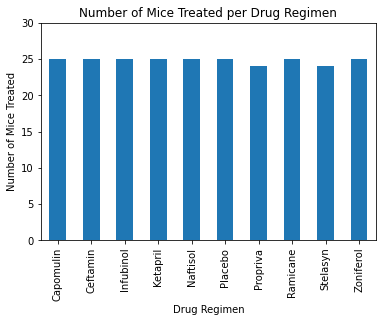

In [47]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_treatment_df = regimen_grouped.agg({"Mouse ID": "nunique"})
mice_per_treatment_df.plot(kind="bar",
                           title="Number of Mice Treated per Drug Regimen",
                           xlabel="Drug Regimen",
                           ylabel="Number of Mice Treated",
                          ylim=(0,30),
                          legend=False)
plt.show()

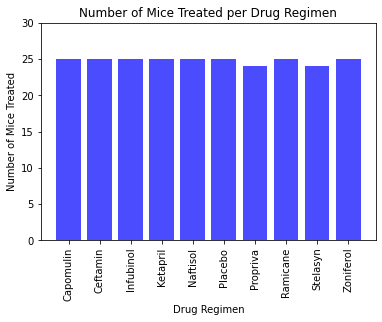

In [55]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(mice_per_treatment_df.index,mice_per_treatment_df["Mouse ID"],color="blue",alpha=0.7)
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("Number of Mice Treated")
plt.ylim(0,30)
plt.title("Number of Mice Treated per Drug Regimen")
plt.show()

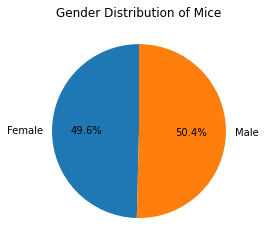

In [186]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouped=clean_df.groupby(["Sex"])
count_gender_df = pd.DataFrame(gender_grouped.nunique()["Mouse ID"])
count_gender_df.plot(kind="pie",autopct='%1.1f%%',startangle=90,subplots=True,legend=False)
plt.ylabel("")
plt.title("Gender Distribution of Mice")
plt.show()


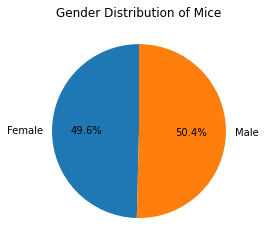

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count_gender_df["Mouse ID"],labels=count_gender_df.index,autopct="%.1f%%",startangle=90)
plt.title("Gender Distribution of Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [112]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Groupby Mouse ID and store rows with the max timepoint.
# Create a new DataFrame for the last time points data.
last_time = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_time_df = pd.DataFrame(last_time)

# Merge the clean_df with the last_time_df on Mouse ID and Timepoint, with the how slected as 'right' so only the rows with last timepoints are taken.
outcome_df=pd.merge(clean_df,last_time_df,on=("Mouse ID","Timepoint"),how="right")

outcome_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [190]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    new_df = outcome_df.loc[outcome_df["Drug Regimen"] == treatment]
    
    # add subset 
    values = new_df["Tumor Volume (mm3)"]
    tumor_vol.append(values)
    
    # Find and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')
    
    # Find upper and lower bounds for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    # Quantitatively check for outliers for each regimen
    outliers_count = (values.loc[(new_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (new_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')
    
# There is one outlier quantitatively identified for Infubinol.

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


([<matplotlib.axis.XTick at 0x1ee812d19a0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

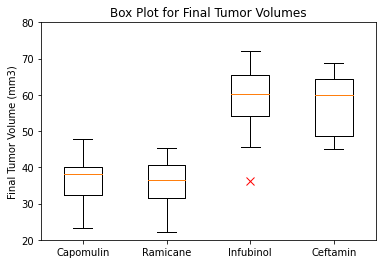

In [182]:
# Generated a box plot of the final tumor volume of each mouse across the four regimens of interest
# Show any outliers on boxplot as red x's
flierprops = dict(marker="x", markersize=8, markeredgecolor="red")

# Show the box plot with title and axis labelled
plt.boxplot(tumor_vol,flierprops=flierprops)
plt.title("Box Plot for Final Tumor Volumes")
plt.ylabel("Final Tumor Volume (mm3)")
plt.ylim(20,80)
plt.xticks([1,2,3,4], treatments)

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

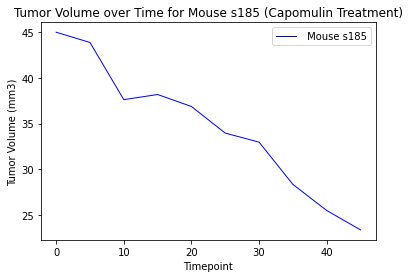

In [136]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Selected mouse ID s185 so create a new DataBase to store all rows containing s185
s185_df = clean_df.loc[clean_df["Mouse ID"] == "s185",:]

# Generated the line plot with title, labeled axis and the legend
plt.plot(s185_df["Timepoint"],s185_df["Tumor Volume (mm3)"],color="blue",linewidth=1,label=" Mouse s185")
plt.legend(loc="upper right")
plt.title("Tumor Volume over Time for Mouse s185 (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

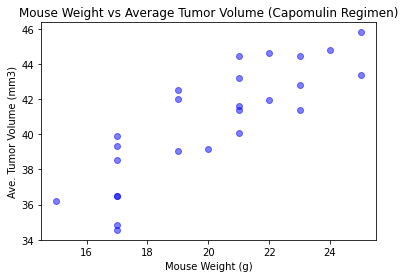

In [159]:
# Create a new DataBase by locating with loc() all the rows that contain "Capomulin" in the Drug Regimen column
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]

# Groupby the Mouse ID and calculate the mean of the columns as we are after the average tumor volume
capomulin_ave_df = capomulin_df.groupby(["Mouse ID"]).mean()

# Rename the Tumor Volume column to Ave Tumor Volume, with title and labeled axis
capomulin_ave_df=capomulin_ave_df.rename(columns={"Tumor Volume (mm3)": "Ave. Tumor Volume (mm3)"})

# Generate a scatter plot of mouse weight versus average tumor volume
plt.scatter(capomulin_ave_df["Weight (g)"],capomulin_ave_df["Ave. Tumor Volume (mm3)"],marker="o",facecolors="blue",edgecolors="blue",alpha=0.5)
plt.title("Mouse Weight vs Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Ave. Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [196]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_ave_df["Weight (g)"],capomulin_ave_df["Ave. Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and average tumor volume for Capomulin regimen is {round(correlation[0],2)}")

# Outcome: correlation=0.84 means there is a strong positive correlation i.e. as mouse weight increases, so does the average tumor volume.

The correlation between mouse weight and average tumor volume for Capomulin regimen is 0.84


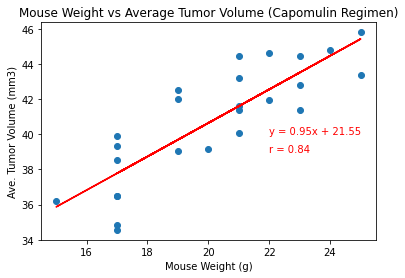

In [194]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Set up the x and y values and then call up the linear regression function
x_values = capomulin_ave_df["Weight (g)"]
y_values = capomulin_ave_df["Ave. Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create the strings for the line equation and r value for how they will be displayed on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_value = "r = " + str(round((rvalue),2))

# Plot the scatter plot, add title, label the axis and annotate the plot with the equation and the r value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,40),fontsize=10,color="red")
plt.annotate(r_value,(22,39),fontsize=10,color="red")
plt.title("Mouse Weight vs Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Ave. Tumor Volume (mm3)")
plt.show()